In [78]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np

I will be investigating the attributes that make the best music. The dataset I will be using is from Spotify and includes artist, song title, and various rating types like energy, speechiness, acousticness, and liveliness.

In [56]:
# read the CSV file using Pandas, and display the top 5 rows
df = pd.read_csv('Spotify.csv')

In [58]:
def get_data(file_name):
    df = pd.read_csv(file_name)
    return df

In [60]:
def check_data(df):
    # check to see if there is any null data
    print('\nChecking for NULL data')
    print(Spotify.isnull().values.any())

In [62]:
file_name = "Spotify.csv"
Spotify = get_data("Spotify.csv")

# now lets see what the dataframe looks like?
Spotify.describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [64]:
Spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [66]:
df.shape

(2017, 17)

In [68]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [70]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [72]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [74]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [76]:
top_5_artists = df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]
print(top_5_artists)

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64


<AxesSubplot:ylabel='artist'>

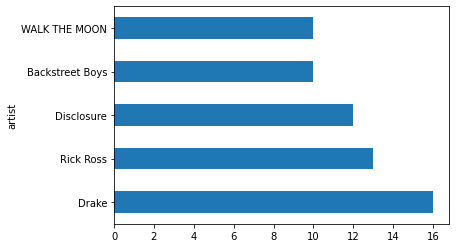

In [80]:
top_5_artists.plot.barh()

In [82]:
top_5_loudest_track = df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
top_5_loudest_track

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


Text(0.5, 1.0, 'top 5 loudest track')

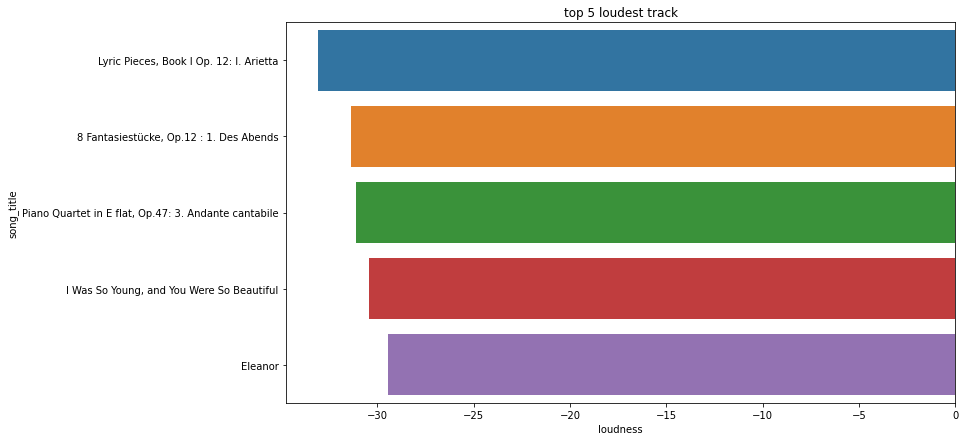

In [84]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness", y="song_title", data=top_5_loudest_track)
plt.title("top 5 loudest track")

In [86]:
top_artists_danceable_songs = df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


Text(0.5, 1.0, 'Danceability on TOP 5 songs')

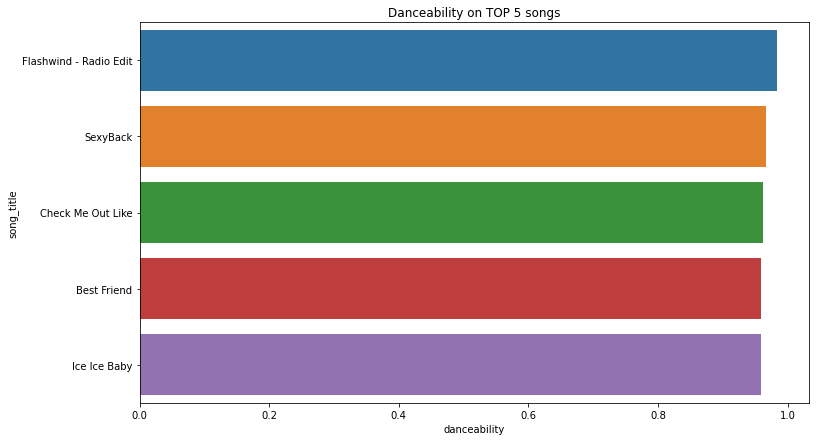

In [88]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability", y="song_title", data =top_artists_danceable_songs)
plt.title("Danceability on TOP 5 songs")

In [90]:
continuous_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
    'liveness', 'loudness',  'tempo',  'valence', 'speechiness', 'instrumentalness']
discrete_cols = ['key','mode','time_signature','target']

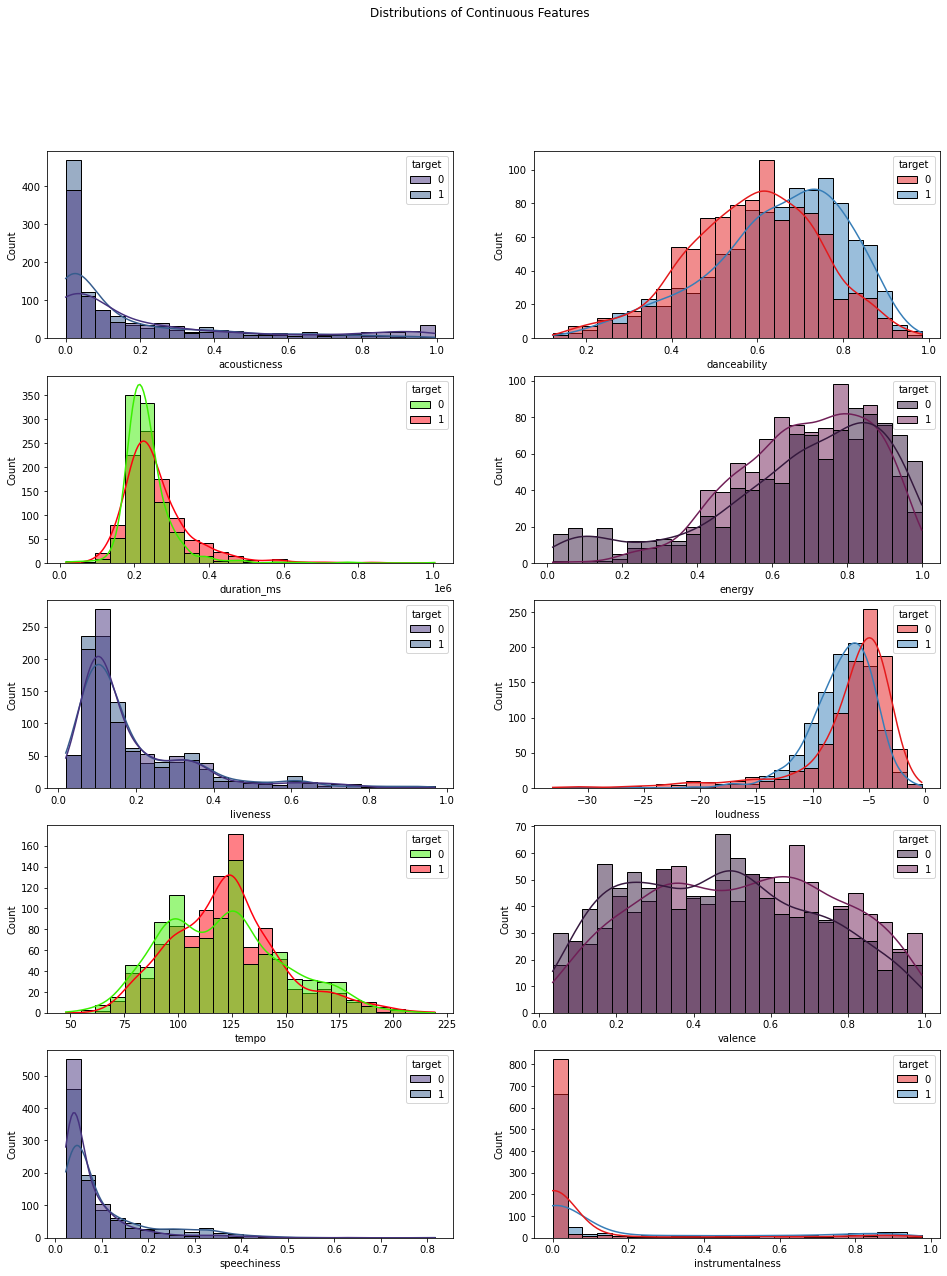

In [93]:
fig, axes = plt.subplots(5,2,figsize=(16,20))
palettes = ['viridis','Set1', 'prism', 'rocket']
axes = axes.flatten()
ax_no = 0
for col in continuous_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.histplot(data = df, x=col, hue='target', bins=25, kde=True, ax = axes[ax_no])
    ax_no += 1
fig.suptitle('Distributions of Continuous Features')
plt.show()

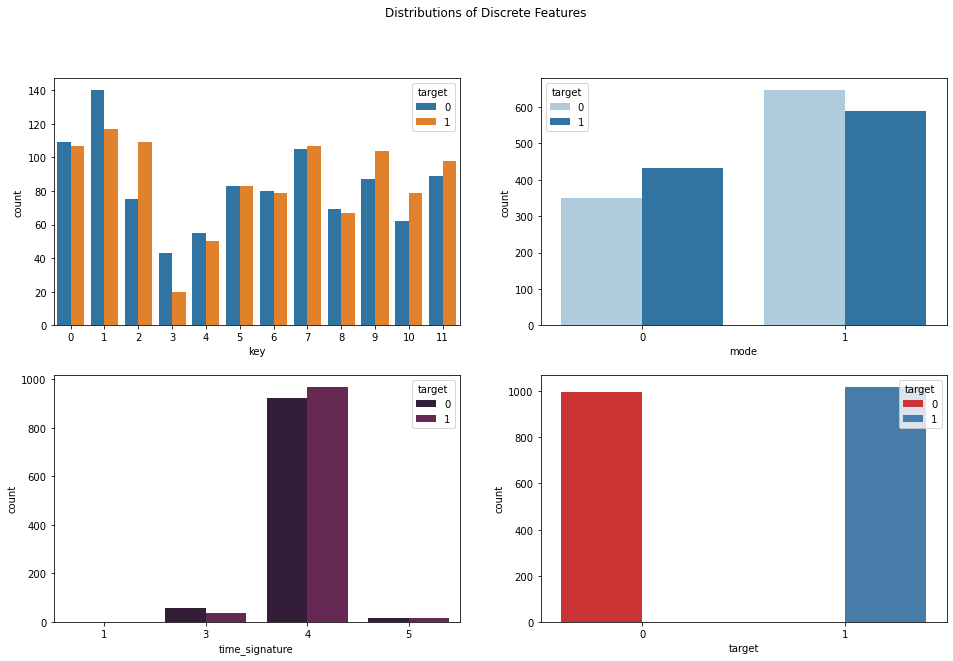

In [95]:
sns.set_palette("Set1")
fig, axes = plt.subplots(2,2,figsize=(16,10))
palettes = ['tab10', 'Paired', 'rocket', 'Set1']
axes = axes.flatten()
ax_no = 0
for col in discrete_cols:
    sns.set_palette(palettes[ax_no%4])
    sns.countplot(data = df, x= col, ax = axes[ax_no], hue='target')
    ax_no += 1
fig.suptitle('Distributions of Discrete Features')
plt.show()

Text(0.5, 1.0, 'Negative Correlations')

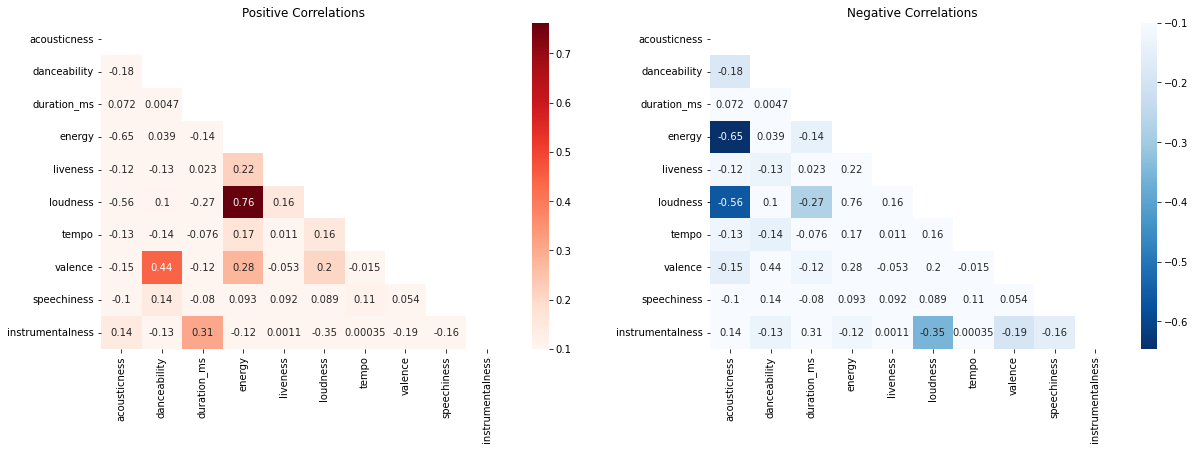

In [97]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
corr = df[continuous_cols].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(data= corr, annot=True, cmap ='Reds', ax = axes[0], mask = mask, vmin= 0.1)
axes[0].set_title('Positive Correlations')
sns.heatmap(data= corr, annot=True, cmap ='Blues_r', ax = axes[1], mask = mask, vmax=-0.1)
axes[1].set_title('Negative Correlations')

Text(0.5, 1.0, 'Artists with most songs')

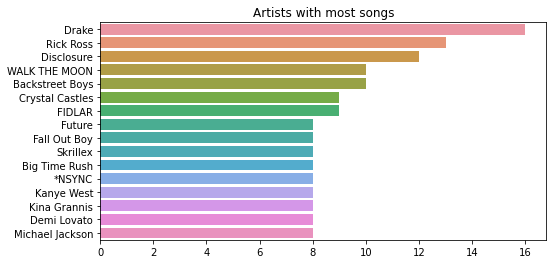

In [99]:
fig , axes = plt.subplots(1,1,figsize=(8,4))
top_artist_count = df.artist.value_counts()
sns.barplot(x = top_artist_count[:16].values, y= top_artist_count[:16].index, ax = axes)
plt.title('Artists with most songs')